In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(filename)
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

used_cars_data.csv
/kaggle/input/us-used-cars-dataset/used_cars_data.csv
ca-dealers-used.csv
/kaggle/input/marketcheck-automotive-data-us-canada/ca-dealers-used.csv
us-dealers-used.csv
/kaggle/input/marketcheck-automotive-data-us-canada/us-dealers-used.csv
vehicles.csv
/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [71]:
pd.set_option('display.max_columns', 500)

dfs = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename != 'ca-dealers-used.csv':
            df = pd.read_csv(os.path.join(dirname, filename), nrows=200)
            display(df.head(3))
            display(df.columns)
            dfs.append(df)
            

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016


Index(['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type',
       'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_certified', 'is_cpo', 'is_new', 'is_oemcpo', 'latitude', 'length',
       'listed_date', 'listing_color', 'listing_id', 'longitude',
       'main_picture_url', 'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'owner_count', 'power', 'price', 'salvage',
       'savings_amount', 'seller_rating', 'sp_id', 'sp_name', 'theft_title',
       'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name',
       'vehicle_damage_category', 'whe

,id,vin,price,miles,stock_no,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,seller_name,street,city,state,zip
0,38b2f52e-8f5d,1GCWGFCF3F1284719,20998.0,115879.0,W1T503168C,2015,Chevrolet,Express Cargo,Work Van,Cargo Van,Truck,RWD,Automatic,E85 / Unleaded,4.8,V,nissan ellicott city,8569 Baltimore National Pike,Ellicott City,MD,21043
1,97ba4955-ccf0,WBY7Z8C59JVB87514,27921.0,7339.0,P33243,2018,BMW,i3,s,Hatchback,Car,RWD,Automatic,Electric / Premium Unleaded,0.6,I,hendrick honda pompano beach,5381 N Federal Highway,Pompano Beach,FL,33064
2,be1da9fd-0f34,ML32F4FJ2JHF10325,11055.0,39798.0,WM2091A,2018,Mitsubishi,Mirage G4,SE,Sedan,Car,FWD,Automatic,Unleaded,1.2,I,russ darrow toyota,2700 West Washington St.,West Bend,WI,53095


Index(['id', 'vin', 'price', 'miles', 'stock_no', 'year', 'make', 'model',
       'trim', 'body_type', 'vehicle_type', 'drivetrain', 'transmission',
       'fuel_type', 'engine_size', 'engine_block', 'seller_name', 'street',
       'city', 'state', 'zip'],
      dtype='object')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

1. vin
2. year
3. make
4. model
5. state
6. miles traveled
7. fuel type
**8. price**

In [72]:

df1 = dfs[0]
df1 = df1[['vin', 'year', 'make_name', 'model_name', 'city', 'mileage', 'fuel_type', 'price']]
df1.columns = ['vin', 'year', 'make', 'model', 'city', 'mileage', 'fuel', 'price']

df2 = dfs[1]
df2 = df2[['vin', 'year', 'make', 'model', 'city', 'miles', 'fuel_type', 'price']]
df2.columns = ['vin', 'year', 'make', 'model', 'city', 'mileage', 'fuel', 'price']

df3 = dfs[2]
df3 = df3[['VIN', 'year', 'manufacturer', 'model', 'region', 'odometer', 'fuel', 'price']]
df3.columns = ['vin', 'year', 'make', 'model', 'city', 'mileage', 'fuel', 'price']

frames=[df1,df2,df3]
df = pd.concat(frames)
display(df)

,vin,year,make,model,city,mileage,fuel,price
0,ZACNJABB5KPJ92081,2019.0,Jeep,Renegade,Bayamon,7.0,Gasoline,23141.0
1,SALCJ2FX1LH858117,2020.0,Land Rover,Discovery Sport,San Juan,8.0,Gasoline,46500.0
2,JF1VA2M67G9829723,2016.0,Subaru,WRX STI,Guaynabo,NaN,Gasoline,46995.0
3,SALRR2RV0L2433391,2020.0,Land Rover,Discovery,San Juan,11.0,Gasoline,67430.0
4,SALCJ2FXXLH862327,2020.0,Land Rover,Discovery Sport,San Juan,7.0,Gasoline,48880.0
...,...,...,...,...,...,...,...,...
195,NaN,2012.0,dodge,charger limousine,birmingham,41000.0,gas,34995.0
196,NaN,2005.0,ford,focus,birmingham,189886.0,gas,3200.0
197,NaN,1999.0,ford,windstar,birmingham,135448.0,gas,3495.0
198,NaN,2002.0,ford,sport trac,birmingham,114775.0,gas,6500.0


In [73]:
cities = sorted(list(df.city.unique()))

In [74]:
df.price.value_counts()

0.0        10
32195.0    10
33990.0     6
27990.0     6
26990.0     6
           ..
32924.0     1
62185.0     1
18800.0     1
16439.0     1
16988.0     1
Name: price, Length: 408, dtype: int64

(array([312., 109.,  60.,  27.,  26.,  23.,   2.,   2.,   0.,   1.]),
 array([     0. ,  37045.7,  74091.4, 111137.1, 148182.8, 185228.5,
        222274.2, 259319.9, 296365.6, 333411.3, 370457. ]),
 <BarContainer object of 10 artists>)

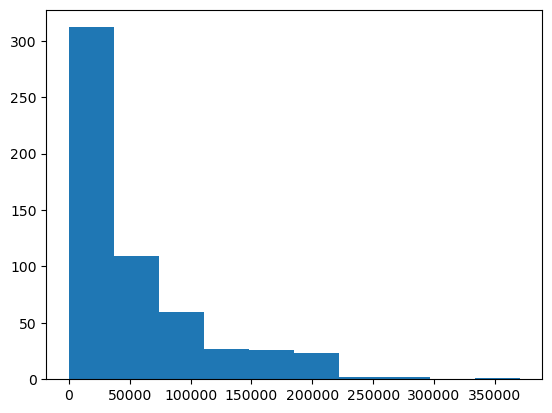

In [75]:
plt.hist(df.mileage)

In [76]:
df = df.dropna()

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['year', 'mileage']], df['price'], test_size=0.2, random_state=42)

In [81]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
clf.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.03125